<a href="https://colab.research.google.com/github/dePolanball/DataScExercises/blob/main/Aurelion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###AND GATE

## Libraries

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np


##Data prep

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])                     # Output

##Perceptron

In [ ]:
perceptron = Perceptron(tol=1e-3, random_state=0) #tolerance tol is the stop threshold i.e if the model improvement goes down below this, it will stop. random state is similar to seed in GenAI
perceptron.fit(X, y) #Passing input and output layer to be mapped in the perceptron

Perceptron()

## Predictive bit

In [ ]:
preds = perceptron.predict(X)

##Results

In [ ]:
print("Inputs: \n", X)
print("Expected Outputs: ", y)
print("Predicted Outputs: ", preds)

Inputs: 
 [0 0 0 1 1 0 1 1]
Expected Outputs:  [0 0 0 1]
Predicted Outputs:  [0 0 0 1]


#NOT Gate

Not writing the comments because they stay the same

In [ ]:
X = np.array([[0], [1]])  # Inputs
y = np.array([1,0])                     # Output

In [ ]:
perceptron = Perceptron(tol=1e-3, random_state=0) #tolerance tol is the stop threshold i.e if the model improvement goes down below this, it will stop. random state is similar to seed in GenAI
perceptron.fit(X, y) #Passing input and output layer to be mapped in the perceptron

Perceptron()

In [ ]:
preds = perceptron.predict(X)

In [ ]:
print("Inputs: \n", X)
print("Expected Outputs: ", y)
print("Predicted Outputs: ", preds)

Inputs: 
 [[0]
 [1]]
Expected Outputs:  [1 0]
Predicted Outputs:  [1 0]


Trying out flatten

In [ ]:
print("Inputs: \n", X.flatten())
print("Expected Outputs: ", y)
print("Predicted Outputs: ", preds)

Inputs: 
 [0 1]
Expected Outputs:  [1 0]
Predicted Outputs:  [1 0]


#OR GATE

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 1])                     # Output

In [ ]:
perceptron = Perceptron(tol=1e-3, random_state=0) #tolerance tol is the stop threshold i.e if the model improvement goes down below this, it will stop. random state is similar to seed in GenAI
perceptron.fit(X, y) #Passing input and output layer to be mapped in the perceptron

Perceptron()

In [ ]:
preds = perceptron.predict(X)

In [ ]:
print("Inputs: \n", X)
print("Expected Outputs: ", y)
print("Predicted Outputs: ", preds)

Inputs: 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected Outputs:  [0 1 1 1]
Predicted Outputs:  [0 1 1 1]


#NOR Gate

Just going to add a not gate to an OR gate. Probably better ways to do this exist than this method, but it makes sense to my hardware-y brain

In [ ]:
ORX = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
ORy = np.array([0, 1, 1, 1])                     # Output

In [ ]:
perceptron_or = Perceptron(tol=1e-3, random_state=0) #tolerance tol is the stop threshold i.e if the model improvement goes down below this, it will stop. random state is similar to seed in GenAI
perceptron_or.fit(ORX, ORy) #Passing input and output layer to be mapped in the perceptron

Perceptron()

In [ ]:
or_preds = perceptron_or.predict(ORX)

Will need to use .reshape() because the NOT function expects a single input. However percerptrons reqiure a 2D Array. The reshape function changes the 1D output into a usable 2D output (I think). .reshape(-1,1). The -1 tells the model to figure out the number of rows to keep the same dimensions and the 1 means there's one column

In [ ]:
norX = or_preds.reshape(-1,1)

In [ ]:
nory = np.array([1, 0, 0, 0])

In [ ]:
perceptron_nor = Perceptron(tol=1e-3, random_state=0)
perceptron_nor.fit(norX, nory)

Perceptron()

In [ ]:
nor_preds = perceptron_nor.predict(norX)

In [ ]:
print("Inputs:\n", ORX)
print("OR Gate Predictions: ", or_preds)
print("NOR Gate Predictions: ", nor_preds)

Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
OR Gate Predictions:  [0 1 1 1]
NOR Gate Predictions:  [1 0 0 0]


Can't believe that actually worked

##XOR (I suppose I can implement it using a series of NOR gates but there's probably a better way -- Ask Sambit Da)

Also I think XOR gates will need more than three perceptrons here. If I string together nor gates thats still like: (Question: HOW) 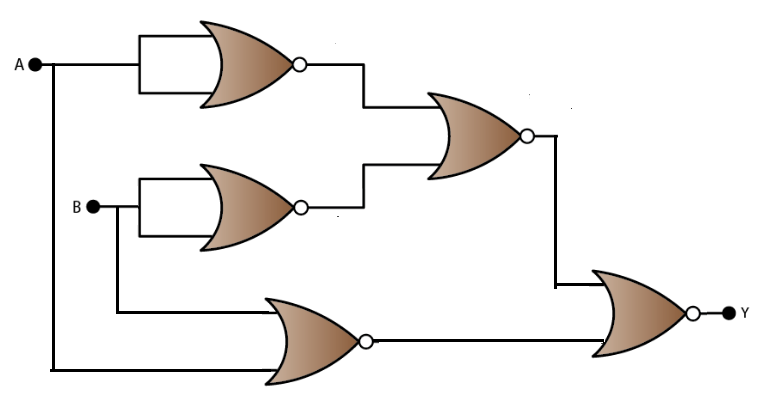

Same inputs are going into three NOR gates As well as A and B being both the imputs in like two of them, All of which are NORed into a cumulative NOR

Code wise thats an initial two nor gates whose inputs are [[0,0],[1,1]] --> Output would be [1,0] --> resize maybe?
The third gets the normal input
Fourth one is the NORed combination of the NORed A and NORed B so [[1,0],[1,0]] which is then NORed with the third o/p so the fifth nor gets [[0,0],[Normal AB NOR table]] But book has done it in three neurons. This approach does not feel like a three neuron one, even if I reuse the last ones.  

##Identity (taken from Sambit da's repo, converted to TF)

In [ ]:
import tensorflow as tf

class IDENTITY(tf.keras.Model):
    def __init__(self):
        super(IDENTITY, self).__init__()
        self.operation = "A = A"

    def call(self, inputs):
        a = inputs
        inputs = tf.concat([a, a], axis=1)
        # Sum across columns
        column_sum = tf.reduce_sum(inputs, axis=1, keepdims=True)
        output = tf.cast(column_sum >= 2, dtype=tf.int32)
        return output

# Instantiate the model
identity = IDENTITY()


In [ ]:
batch = tf.constant([[0], [1]])

In [ ]:
outputs = identity(batch)
print(outputs)

tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int32)


##AND

In [ ]:
import tensorflow as tf

class AND(tf.keras.Model):
    def __init__(self):
        super(AND, self).__init__()
        self.operation = "C = A AND B"

    def call(self, inputs):
        a = inputs['a']
        b = inputs['b']
        inputs = tf.concat([a, b], axis=1)
        column_sum = tf.reduce_sum(inputs, axis=1, keepdims=True)
        output = tf.cast(column_sum == 2, dtype=tf.int32) ##I'm checking if column sum is 2 and only 2, then assign boolean TRUE
        return output

In [ ]:
logical_and = AND()

In [ ]:
val = {'a': tf.constant([[0], [0], [1], [1]]), 'b': tf.constant([[0], [1], [0], [1]])}

In [ ]:
output1 = logical_and(val)
print(output1)


tf.Tensor(
[[0]
 [0]
 [0]
 [1]], shape=(4, 1), dtype=int32)


##OR

In [23]:
import tensorflow as tf

class OR(tf.keras.Model):
    def __init__(self):
        super(OR, self).__init__()
        self.operation = "C = A OR B"


    def call(self, inputs):
        a = inputs['a']
        b = inputs['b']
        inputs = tf.concat([a, b], axis=1)
        column_sum = tf.reduce_sum(inputs, axis=1, keepdims=True)
        output = tf.cast(column_sum>0, dtype=tf.int32) ## How do I do XOR now
        return output

In [24]:
logical_or = OR()

In [25]:
val = {'a': tf.constant([[0], [0], [1], [1]]), 'b': tf.constant([[0], [1], [0], [1]])}

In [26]:
output1 = logical_or(val)
print(output1)

tf.Tensor(
[[0]
 [1]
 [1]
 [1]], shape=(4, 1), dtype=int32)


##XOR

In [63]:
import tensorflow as tf

In [72]:
class XOR(tf.keras.Model):
    def __init__(self):
        super(XOR, self).__init__()

        self.layer0_w = tf.Variable([[1., 1.], [1., 1.]], dtype=tf.float32)
        self.layer0_b = tf.Variable([-1.5, -0.5], dtype=tf.float32)
        self.layer1_w = tf.Variable([[-1.], [1.]], dtype=tf.float32)
        self.layer1_b = tf.Variable([-0.5], dtype=tf.float32)

    def heavyside(self, x):
        return tf.cast(x >= 0, tf.float32)

    def call(self, inputs):
        a = tf.cast(inputs['a'], tf.float32)
        b = tf.cast(inputs['b'], tf.float32)
        inputs = tf.concat([a, b], axis=1)

        # first layer
        layer1_out = tf.matmul(inputs, self.layer0_w) + self.layer0_b
        layer1_act = self.heavyside(layer1_out)

        #  second layer
        layer2_out = tf.matmul(layer1_act, self.layer1_w) + self.layer1_b
        return self.heavyside(layer2_out)

In [73]:
model = XOR()

In [74]:
inputs = {
    'a': tf.constant([[0], [0], [1], [1]], dtype=tf.float32),
    'b': tf.constant([[0], [1], [0], [1]], dtype=tf.float32)}

In [75]:
output = model(inputs)
print("XOR Output:\n", output)

XOR Output:
 tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
